In [57]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

env: KERAS_BACKEND=tensorflow


### 載入資料及整理輸出輸入格式

In [7]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [8]:
x_train = x_train0.reshape(60000, 28, 28, 1)
x_test = x_test0.reshape(10000, 28, 28, 1)

y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

### 建立CNN model
設定3層的CNN，filter依序為3、6、9個，filter大小皆為3x3，激勵函數為relu，每層所接的max-pooling以2x2為單位。<br>
扁平化之後放入一般的神經網路，只有一個隱藏層，1000個神經元，激勵函數同為relu，輸出則使用softmax。<br>
最後compile時將loss function定為categorical_crossentropy，優化器使用Adam，learning rate = 0.0005<br>
後透過訓練資料訓練此模型後進行驗證，可達到97%、98%的正確率。

In [105]:
model = Sequential()

# first layer
model.add(Conv2D(3, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# second layer
model.add(Conv2D(6, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# third layer
model.add(Conv2D(9, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [106]:
# 拉平
model.add(Flatten())

# 送進一般神經網路(1層隱藏層)
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics=['accuracy'])

In [107]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 28, 28, 3)         30        
_________________________________________________________________
activation_112 (Activation)  (None, 28, 28, 3)         0         
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 14, 14, 3)         0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 14, 14, 6)         168       
_________________________________________________________________
activation_113 (Activation)  (None, 14, 14, 6)         0         
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 7, 7, 6)           0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 7, 7, 9)           495       
__________

In [108]:
m_fit = model.fit(x_train, y_train, batch_size=100, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 40s 674us/step - loss: 5.4898 - acc: 0.5962 - val_loss: 1.8229 - val_acc: 0.8223
Epoch 2/10
60000/60000 [==============================] - 38s 633us/step - loss: 1.7589 - acc: 0.8423 - val_loss: 1.7236 - val_acc: 0.8568
Epoch 3/10
60000/60000 [==============================] - 37s 620us/step - loss: 1.6960 - acc: 0.8634 - val_loss: 1.6782 - val_acc: 0.8711
Epoch 4/10
60000/60000 [==============================] - 40s 665us/step - loss: 0.6721 - acc: 0.9243 - val_loss: 0.1283 - val_acc: 0.9582
Epoch 5/10
60000/60000 [==============================] - 53s 881us/step - loss: 0.0987 - acc: 0.9684 - val_loss: 0.0929 - val_acc: 0.9714
Epoch 6/10
60000/60000 [==============================] - 52s 869us/step - loss: 0.0798 - acc: 0.9739 - val_loss: 0.0895 - val_acc: 0.9709
Epoch 7/10
60000/60000 [==============================] - 54s 906us/step - loss: 0.0669 - acc: 0.9785 - val_loss: 0.

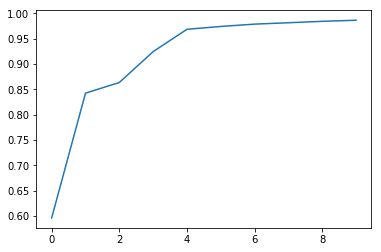

In [109]:
plt.plot(m_fit.history["acc"])

In [110]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 341us/step


[0.09297079792425503, 0.9726]

In [111]:
model.save('HW0503model.h5')